# ChatGPT Tweet Sentimental Analysis

This dataset contains a collection of tweets with the hashtag #chatgpt. The tweets were scraped from Twitter and cover a range of topics related to the ChatGPT language model. The dataset includes the following information for each tweet:

- Tweet text
- User information (username, user ID, location, etc.)
- Tweet timestamp
- Retweet and favorite count
- URLs


Here, we have chosen the dataset from the kaggle for training. Below is the link for the same. "https://www.kaggle.com/datasets/tariqsays/chatgpt-twitter-dataset" .

Also we have scraped 7000 tweets from twitter and used it for testing the model.

The dataset provides a glimpse into the online conversation surrounding the ChatGPT language model and can be used for various natural language processing and machine learning tasks, such as sentiment analysis, topic modeling, and more. It allows understanding the community, the level of interest, and the use of chatGPT.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install tweet-preprocessor
import preprocessor as p
import re
import nltk
nltk.download
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- Our train dataset contains 50001 rows and  14 column values.
- Our test dataset contains 7000 rows and  14 column values.


In [ ]:
df_train = pd.read_csv('traindata.csv')
df_train.head()

Permalink  \
0  https://twitter.com/mochico0123/status/1617156...   
1  https://twitter.com/Caput_LupinumSG/status/161...   
2  https://twitter.com/ciffi/status/1617156308926...   
3  https://twitter.com/Vishwasrisiri/status/16171...   
4  https://twitter.com/0xGenetikciniz/status/1617...   

                    Datetime      Tweet Id  \
0  2023-01-22 13:44:34+00:00  1.620000e+18   
1  2023-01-22 13:44:39+00:00  1.620000e+18   
2  2023-01-22 13:44:44+00:00  1.620000e+18   
3  2023-01-22 13:44:49+00:00  1.620000e+18   
4  2023-01-22 13:44:52+00:00  1.620000e+18   

                                                Text         Username  \
0  ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...      mochico0123   
1  @AlexandrovnaIng Prohibition of ChatGPT has be...  Caput_LupinumSG   
2  Schaut Euch an, was @fobizz @DianaKnodel alles...            ciffi   
3  Bow down to chatGPT 🫡..... https://t.co/ENTSzi...    Vishwasrisiri   
4  Profilinde vatan, Türkiye falan yazan bireyler...   0xGenetikciniz   

                               User ID  \
0      https://twitter.com/mochico0123   
1  https://twitter.com/Caput_LupinumSG   
2            https://twitter.com/ciffi   
3    https://twitter.com/Vishwasrisiri   
4   https://twitter.com/0xGenetikciniz   

                                            Outlinks  ReplyCount  \
0                                                NaN           1   
1                                                NaN           1   
2  ['https://us02web.zoom.us/webinar/register/801...           0   
3  ['https://twitter.com/agadmator/status/1617155...           0   
4                                                NaN           0   

   RetweetCount  LikeCount  QuoteCount Language  \
0             0          5           0       ja   
1             0          5           0       en   
2             0          4           0       de   
3             0          2           0       en   
4             0          4           0       tr   

                                              Source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/#!/download/ipad" ...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/iphone" r...   

                                         QuotedTweet  
0                                                NaN  
1                                                NaN  
2  https://twitter.com/DianaKnodel/status/1617153...  
3  https://twitter.com/agadmator/status/161715501...  
4                                                NaN

In [ ]:
df_test = pd.read_csv('testdata.csv')
df_test.head()

Permalink  \
0  https://twitter.com/seeingwithsound/status/164...   
1  https://twitter.com/technology_2021/status/164...   
2  https://twitter.com/intstrategist/status/16420...   
3  https://twitter.com/AGiga93/status/16420681268...   
4  https://twitter.com/isma_sanchez/status/164206...   

                    Datetime  \
0  2023-04-01 07:35:25+00:00   
1  2023-04-01 07:35:25+00:00   
2  2023-04-01 07:35:24+00:00   
3  2023-04-01 07:35:24+00:00   
4  2023-04-01 07:35:23+00:00   

                                                Text      Tweet Id  \
0  Microsoft invests $10 billion in OpenAI's Chat...  1.640000e+18   
1  【Current Affairs Ask AI】Randomly generate Wind...  1.640000e+18   
2  Italy curbs ChatGPT, starts probe over privacy...  1.640000e+18   
3  I want to wake up every morning with you by my...  1.640000e+18   
4  ChatGPT Is Banned in Italy Over Privacy Concer...  1.640000e+18   

        User ID         Username  \
0  2.248188e+07  seeingwithsound   
1  1.690477e+08  technology_2021   
2  3.312005e+09    intstrategist   
3  1.630000e+18          AGiga93   
4  1.194278e+08     isma_sanchez   

                                            Outlinks  ReplyCount  \
0                                                 []           0   
1                         ['https://ift.tt/eCf1Oja']           0   
2  ['http://uk.reuters.com/article/italy-chatgpt-...           0   
3                                                 []           0   
4  ['https://www.nytimes.com/2023/03/31/technolog...           0   

   RetweetCount  LikeCount  QuoteCount Language  \
0             0          0           0       en   
1             0          0           0       en   
2             0          0           0       en   
3             0          0           0       en   
4             0          0           0       en   

                                              source QuotedTweet  
0  <a href="https://mobile.twitter.com" rel="nofo...         NaN  
1  <a href="https://ifttt.com" rel="nofollow">IFT...         NaN  
2  <a href="http://twitter.com/#!/download/ipad" ...         NaN  
3  <a href="https://mobile.twitter.com" rel="nofo...         NaN  
4  <a href="http://twitter.com/download/android" ...         NaN

In [ ]:
df_train.shape

(50001, 14)

In [ ]:
df_test.shape

(7000, 14)

In [ ]:
df_train.columns

Index(['Permalink', 'Datetime', 'Tweet Id', 'Text', 'Username', 'User ID',
       'Outlinks', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount',
       'Language', 'Source', 'QuotedTweet'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Permalink', 'Datetime', 'Text', 'Tweet Id', 'User ID', 'Username',
       'Outlinks', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount',
       'Language', 'source', 'QuotedTweet'],
      dtype='object')

- Above are the features that we have extracted from the twitter

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
df_train.isnull().sum()

Permalink           0
Datetime            0
Tweet Id            0
Text                0
Username            0
User ID             0
Outlinks        30059
ReplyCount          0
RetweetCount        0
LikeCount           0
QuoteCount          0
Language            0
Source              0
QuotedTweet     46438
dtype: int64

In [ ]:
df_test.isnull().sum()

Permalink          0
Datetime           0
Text               0
Tweet Id           0
User ID            0
Username           0
Outlinks           0
ReplyCount         0
RetweetCount       0
LikeCount          0
QuoteCount         0
Language           0
source             0
QuotedTweet     6693
dtype: int64

- We could find null values in outlink and quoted tweets. However, since we are doing NLP those features are not important for modelling. Hence we have remove those features

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Permalink     50001 non-null  object 
 1   Datetime      50001 non-null  object 
 2   Tweet Id      50001 non-null  float64
 3   Text          50001 non-null  object 
 4   Username      50001 non-null  object 
 5   User ID       50001 non-null  object 
 6   Outlinks      19942 non-null  object 
 7   ReplyCount    50001 non-null  int64  
 8   RetweetCount  50001 non-null  int64  
 9   LikeCount     50001 non-null  int64  
 10  QuoteCount    50001 non-null  int64  
 11  Language      50001 non-null  object 
 12  Source        50001 non-null  object 
 13  QuotedTweet   3563 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 5.3+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Permalink     7000 non-null   object 
 1   Datetime      7000 non-null   object 
 2   Text          7000 non-null   object 
 3   Tweet Id      7000 non-null   float64
 4   User ID       7000 non-null   float64
 5   Username      7000 non-null   object 
 6   Outlinks      7000 non-null   object 
 7   ReplyCount    7000 non-null   int64  
 8   RetweetCount  7000 non-null   int64  
 9   LikeCount     7000 non-null   int64  
 10  QuoteCount    7000 non-null   int64  
 11  Language      7000 non-null   object 
 12  source        7000 non-null   object 
 13  QuotedTweet   307 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 765.8+ KB


In [ ]:
df_train.drop('QuotedTweet',axis=1,inplace = True)
df_test.drop('QuotedTweet',axis=1,inplace = True)

In [ ]:
df_train[['ReplyCount','RetweetCount','LikeCount','QuoteCount']].describe()

ReplyCount  RetweetCount     LikeCount    QuoteCount
count  50001.000000  50001.000000  50001.000000  50001.000000
mean       0.929141      1.498510      9.696326      0.219536
std       23.251710     46.030058    313.524215     10.356329
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000
75%        1.000000      0.000000      2.000000      0.000000
max     3098.000000   6815.000000  56073.000000   1947.000000

In [ ]:
df_test.columns

Index(['Permalink', 'Datetime', 'Text', 'Tweet Id', 'User ID', 'Username',
       'Outlinks', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount',
       'Language', 'source'],
      dtype='object')

In [ ]:
df_test[['ReplyCount','RetweetCount','LikeCount','QuoteCount']].describe()

ReplyCount  RetweetCount    LikeCount   QuoteCount
count  7000.000000   7000.000000  7000.000000  7000.000000
mean      0.306857      0.255429     0.848286     0.019000
std       1.621970      1.733547     4.306464     0.189174
min       0.000000      0.000000     0.000000     0.000000
25%       0.000000      0.000000     0.000000     0.000000
50%       0.000000      0.000000     0.000000     0.000000
75%       0.000000      0.000000     0.000000     0.000000
max      56.000000     48.000000   198.000000     7.000000

In [ ]:
df_train.nunique()

Permalink       50001
Datetime        41559
Tweet Id            1
Text            49552
Username        38433
User ID         38433
Outlinks        13769
ReplyCount        108
RetweetCount      138
LikeCount         366
QuoteCount         51
Language           61
Source            843
dtype: int64

In [ ]:
df_test.nunique()

Permalink       7000
Datetime        5038
Text            6933
Tweet Id           3
User ID         3627
Username        5792
Outlinks        1848
ReplyCount        25
RetweetCount      26
LikeCount         42
QuoteCount         7
Language          51
source           215
dtype: int64

- We could find that the permalink is unique for each tweet

In [ ]:
df_train['Language'].value_counts()

en    32076
ja     5046
es     3315
fr     2492
de     1207
      ...  
sd        1
am        1
hy        1
or        1
bn        1
Name: Language, Length: 61, dtype: int64

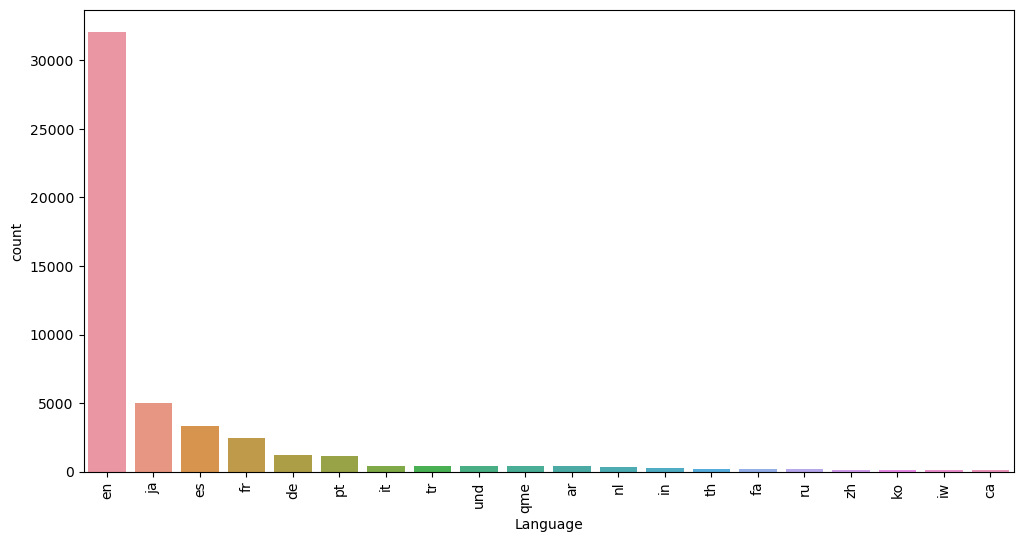

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, x='Language', order=df_train["Language"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

- In our dataset about 64 percent of the text is in English Language. Hence for our model we are only choosing english language tweets for our model

In [ ]:
df_train1= df_train[df_train['Language'] == 'en']

In [ ]:
df_train1.shape

(32076, 13)

In [ ]:
df_train1.head()

Permalink  \
1  https://twitter.com/Caput_LupinumSG/status/161...   
3  https://twitter.com/Vishwasrisiri/status/16171...   
6  https://twitter.com/FierceElectron/status/1617...   
7  https://twitter.com/xlr8harder/status/16171563...   
8  https://twitter.com/Kosuke_dazo/status/1617156...   

                    Datetime      Tweet Id  \
1  2023-01-22 13:44:39+00:00  1.620000e+18   
3  2023-01-22 13:44:49+00:00  1.620000e+18   
6  2023-01-22 13:45:03+00:00  1.620000e+18   
7  2023-01-22 13:45:04+00:00  1.620000e+18   
8  2023-01-22 13:45:06+00:00  1.620000e+18   

                                                Text         Username  \
1  @AlexandrovnaIng Prohibition of ChatGPT has be...  Caput_LupinumSG   
3  Bow down to chatGPT 🫡..... https://t.co/ENTSzi...    Vishwasrisiri   
6  ChatGPT runs 10K Nvidia training GPUs with pot...   FierceElectron   
7  @SWENGDAD There is repetitive work in every jo...       xlr8harder   
8  I created a fictional jewelry brand using Chat...      Kosuke_dazo   

                               User ID  \
1  https://twitter.com/Caput_LupinumSG   
3    https://twitter.com/Vishwasrisiri   
6   https://twitter.com/FierceElectron   
7       https://twitter.com/xlr8harder   
8      https://twitter.com/Kosuke_dazo   

                                            Outlinks  ReplyCount  \
1                                                NaN           1   
3  ['https://twitter.com/agadmator/status/1617155...           0   
6  ['https://www.fierceelectronics.com/sensors/ch...           0   
7                                                NaN           1   
8                  ['https://oriori.my.canva.site/']           0   

   RetweetCount  LikeCount  QuoteCount Language  \
1             0          5           0       en   
3             0          2           0       en   
6             0          0           0       en   
7             0          3           0       en   
8             1          2           1       en   

                                              Source  
1  <a href="http://twitter.com/download/iphone" r...  
3  <a href="http://twitter.com/download/android" ...  
6  <a href="https://mobile.twitter.com" rel="nofo...  
7  <a href="https://mobile.twitter.com" rel="nofo...  
8  <a href="http://twitter.com/download/iphone" r...

In [ ]:
df_test1= df_test[df_test['Language'] == 'en']

In [ ]:
df_test1.shape

(3442, 14)

In [ ]:
df_test1.head()

Permalink  \
0  https://twitter.com/seeingwithsound/status/164...   
1  https://twitter.com/technology_2021/status/164...   
2  https://twitter.com/intstrategist/status/16420...   
3  https://twitter.com/AGiga93/status/16420681268...   
4  https://twitter.com/isma_sanchez/status/164206...   

                    Datetime  \
0  2023-04-01 07:35:25+00:00   
1  2023-04-01 07:35:25+00:00   
2  2023-04-01 07:35:24+00:00   
3  2023-04-01 07:35:24+00:00   
4  2023-04-01 07:35:23+00:00   

                                                Text      Tweet Id  \
0  Microsoft invests $10 billion in OpenAI's Chat...  1.640000e+18   
1  【Current Affairs Ask AI】Randomly generate Wind...  1.640000e+18   
2  Italy curbs ChatGPT, starts probe over privacy...  1.640000e+18   
3  I want to wake up every morning with you by my...  1.640000e+18   
4  ChatGPT Is Banned in Italy Over Privacy Concer...  1.640000e+18   

        User ID         Username  \
0  2.248188e+07  seeingwithsound   
1  1.690477e+08  technology_2021   
2  3.312005e+09    intstrategist   
3  1.630000e+18          AGiga93   
4  1.194278e+08     isma_sanchez   

                                            Outlinks  ReplyCount  \
0                                                 []           0   
1                         ['https://ift.tt/eCf1Oja']           0   
2  ['http://uk.reuters.com/article/italy-chatgpt-...           0   
3                                                 []           0   
4  ['https://www.nytimes.com/2023/03/31/technolog...           0   

   RetweetCount  LikeCount  QuoteCount Language  \
0             0          0           0       en   
1             0          0           0       en   
2             0          0           0       en   
3             0          0           0       en   
4             0          0           0       en   

                                              source QuotedTweet  
0  <a href="https://mobile.twitter.com" rel="nofo...         NaN  
1  <a href="https://ifttt.com" rel="nofollow">IFT...         NaN  
2  <a href="http://twitter.com/#!/download/ipad" ...         NaN  
3  <a href="https://mobile.twitter.com" rel="nofo...         NaN  
4  <a href="http://twitter.com/download/android" ...         NaN

In [ ]:
df_train1['LikeCount'].value_counts()

0       17513
1        6202
2        2508
3        1297
4         770
        ...  
347         1
214         1
2297        1
324         1
171         1
Name: LikeCount, Length: 318, dtype: int64

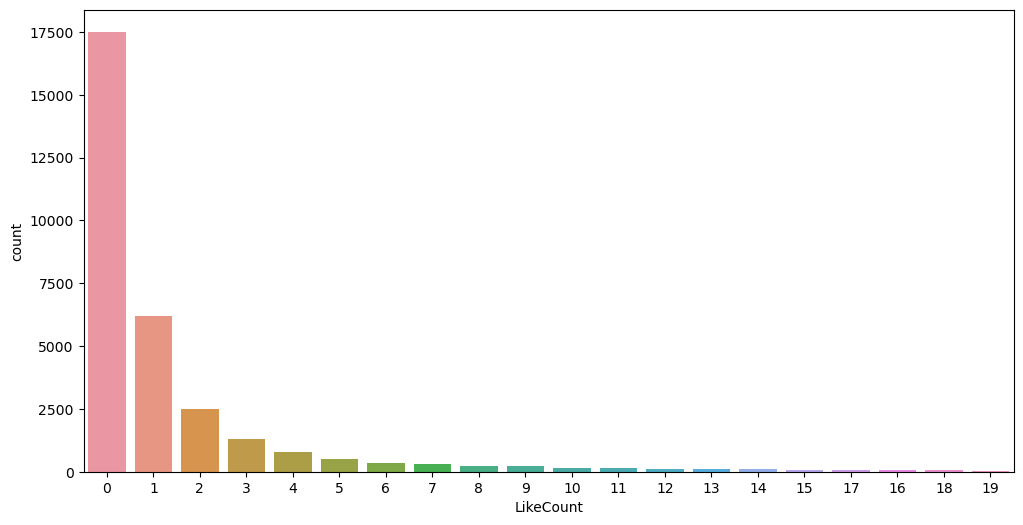

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train1, x='LikeCount', order=df_train1["LikeCount"].value_counts().index[:20])
plt.show()

In [ ]:
df_train1['ReplyCount'].value_counts()

0      23198
1       6218
2       1236
3        433
4        242
       ...  
446        1
52         1
45         1
147        1
331        1
Name: ReplyCount, Length: 101, dtype: int64

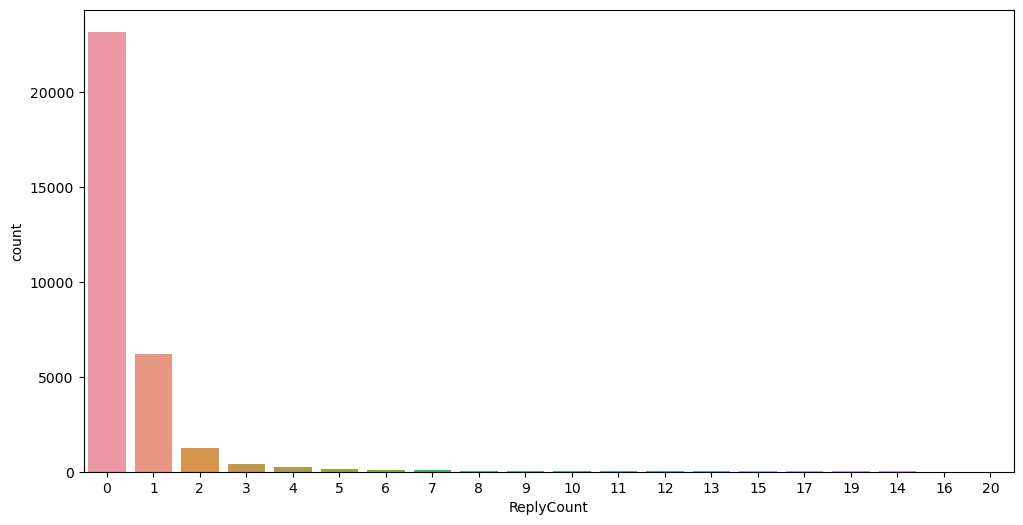

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train1, x='ReplyCount', order=df_train1["ReplyCount"].value_counts().index[:20])
plt.show()

In [ ]:
df_train1['QuoteCount'].value_counts()

0       30560
1         996
2         219
3         103
4          48
5          22
6          16
7          16
9          13
10         10
8           9
11          9
27          6
14          4
12          4
25          3
16          3
15          3
38          2
60          2
24          2
37          2
126         1
413         1
55          1
17          1
19          1
42          1
46          1
20          1
374         1
45          1
18          1
1947        1
48          1
726         1
495         1
23          1
29          1
81          1
80          1
110         1
298         1
205         1
22          1
456         1
Name: QuoteCount, dtype: int64

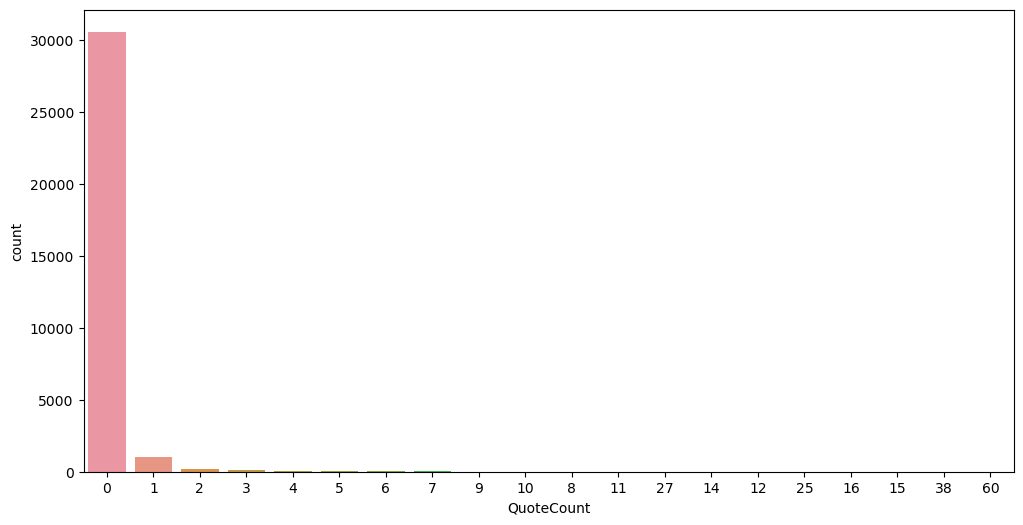

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train1, x='QuoteCount', order=df_train1["QuoteCount"].value_counts().index[:20])
plt.show()

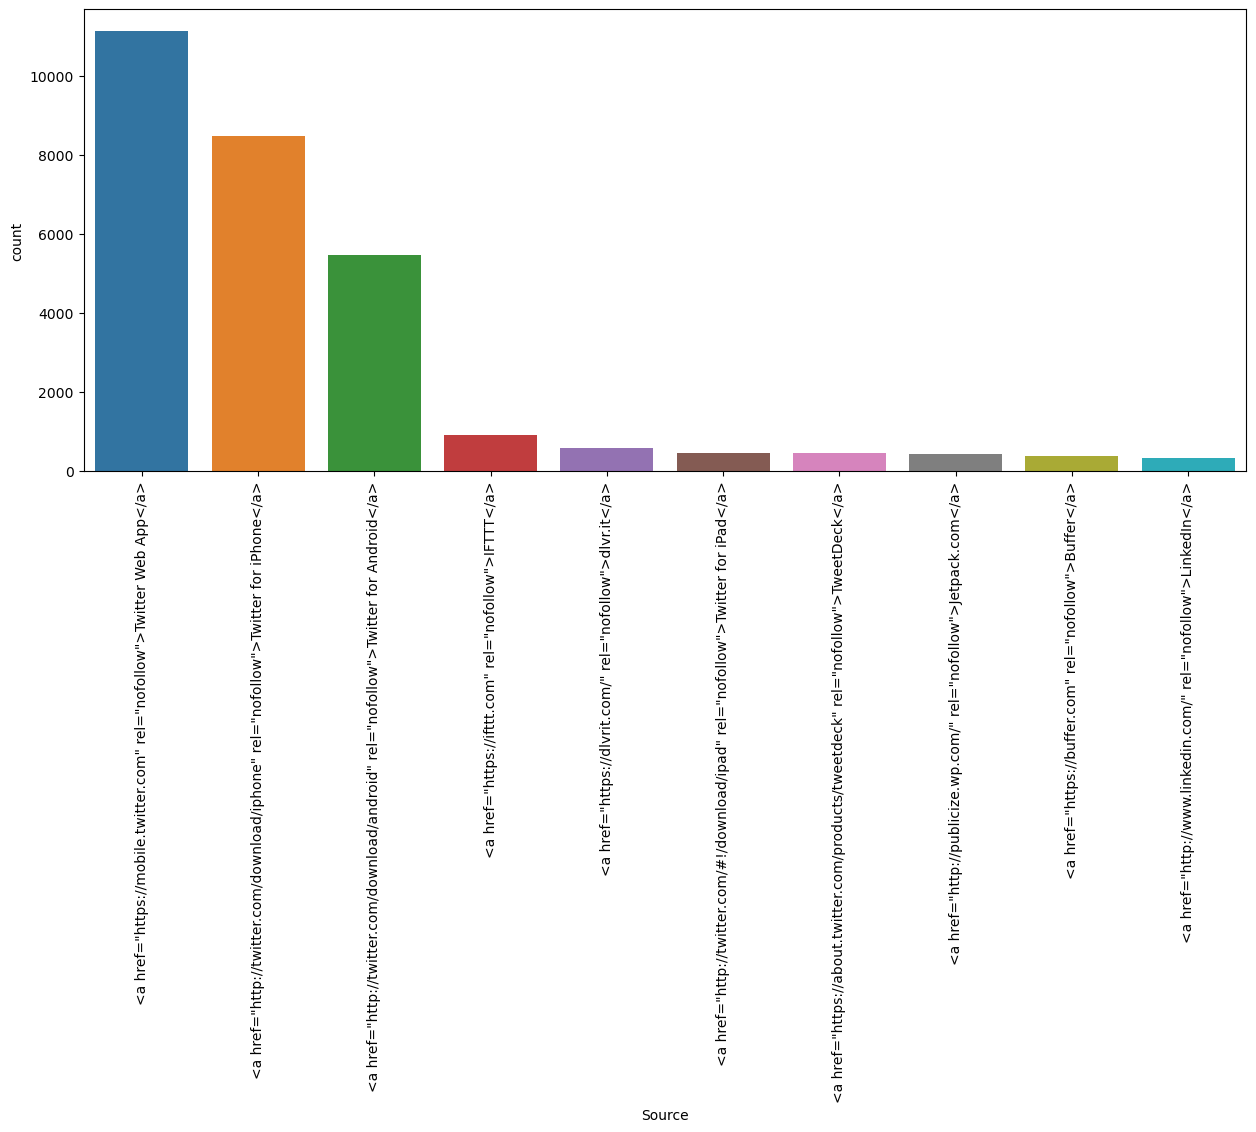

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_train1, x='Source', order=df_train1["Source"].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.show()

### Removing columns that are not required for our model building

In [ ]:

df_train1.drop(['Datetime', 'Tweet Id', 'Username', 'Permalink', 'User ID','Outlinks', 'ReplyCount', 'RetweetCount', 'LikeCount','QuoteCount', 'Language', 'Source'], axis = 1, inplace = True)


In [ ]:
df_test1.columns

Index(['Permalink', 'Datetime', 'Text', 'Tweet Id', 'User ID', 'Username',
       'Outlinks', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount',
       'Language', 'source', 'QuotedTweet'],
      dtype='object')

In [ ]:
# Removing columns that are not required
df_test1.drop(['Datetime', 'Tweet Id', 'Username', 'Permalink', 'User ID','Outlinks', 'ReplyCount', 'RetweetCount', 'LikeCount','QuoteCount', 'Language', 'source'], axis = 1, inplace = True)


In [ ]:
df_train1.head()

Text
1  @AlexandrovnaIng Prohibition of ChatGPT has be...
3  Bow down to chatGPT 🫡..... https://t.co/ENTSzi...
6  ChatGPT runs 10K Nvidia training GPUs with pot...
7  @SWENGDAD There is repetitive work in every jo...
8  I created a fictional jewelry brand using Chat...

In [ ]:
df_test1.head()

Text QuotedTweet
0  Microsoft invests $10 billion in OpenAI's Chat...         NaN
1  【Current Affairs Ask AI】Randomly generate Wind...         NaN
2  Italy curbs ChatGPT, starts probe over privacy...         NaN
3  I want to wake up every morning with you by my...         NaN
4  ChatGPT Is Banned in Italy Over Privacy Concer...         NaN

In [ ]:
# Forming a separate feature for cleaned tweets after removing links, tags and symbols.
cleaned_tweet_list = []
for i in df_train1.index:
    cleaned_tweet = p.clean(df_train1.loc[i, 'Text'])
    cleaned_tweet_list.append(cleaned_tweet)
df_train1.insert(loc = 1, column = 'Cleaned_Text', value = cleaned_tweet_list)
df_train1.head()

Text  \
1  @AlexandrovnaIng Prohibition of ChatGPT has be...   
3  Bow down to chatGPT 🫡..... https://t.co/ENTSzi...   
6  ChatGPT runs 10K Nvidia training GPUs with pot...   
7  @SWENGDAD There is repetitive work in every jo...   
8  I created a fictional jewelry brand using Chat...   

                                        Cleaned_Text  
1  Prohibition of ChatGPT has been added to the h...  
3                          Bow down to chatGPT .....  
6  ChatGPT runs K Nvidia training GPUs with poten...  
7  There is repetitive work in every job, there a...  
8  I created a fictional jewelry brand using Chat...

### # Forming a separate feature for cleaned tweets after removing links, tags and symbols.

In [ ]:
cleaned_tweet_list = []
for i in df_test1.index:
    cleaned_tweet = p.clean(df_test1.loc[i, 'Text'])
    cleaned_tweet_list.append(cleaned_tweet)
df_test1.insert(loc = 1, column = 'Cleaned_Text', value = cleaned_tweet_list)
df_test1.head()

Text  \
0  Microsoft invests $10 billion in OpenAI's Chat...   
1  【Current Affairs Ask AI】Randomly generate Wind...   
2  Italy curbs ChatGPT, starts probe over privacy...   
3  I want to wake up every morning with you by my...   
4  ChatGPT Is Banned in Italy Over Privacy Concer...   

                                        Cleaned_Text  
0  Microsoft invests $10 billion in OpenAI's Chat...  
1  Current Affairs Ask AIRandomly generate Window...  
2  Italy curbs ChatGPT, starts probe over privacy...  
3  I want to wake up every morning with you by my...  
4   ChatGPT Is Banned in Italy Over Privacy Concerns

### Converting text to lowercase

In [ ]:

df_train1.loc[:, 'Cleaned_Text'] = df_train1.loc[:, 'Cleaned_Text'].str.lower()
df_train1.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\2659150143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1.loc[:, 'Cleaned_Text'] = df_train1.loc[:, 'Cleaned_Text'].str.lower()


Text  \
1  @AlexandrovnaIng Prohibition of ChatGPT has be...   
3  Bow down to chatGPT 🫡..... https://t.co/ENTSzi...   
6  ChatGPT runs 10K Nvidia training GPUs with pot...   
7  @SWENGDAD There is repetitive work in every jo...   
8  I created a fictional jewelry brand using Chat...   

                                        Cleaned_Text  
1  prohibition of chatgpt has been added to the h...  
3                          bow down to chatgpt .....  
6  chatgpt runs k nvidia training gpus with poten...  
7  there is repetitive work in every job, there a...  
8  i created a fictional jewelry brand using chat...

In [ ]:
# Converting text to lowercase
df_test1.loc[:, 'Cleaned_Text'] = df_test1.loc[:, 'Cleaned_Text'].str.lower()
df_test1.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\793303991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1.loc[:, 'Cleaned_Text'] = df_test1.loc[:, 'Cleaned_Text'].str.lower()


Text  \
0  Microsoft invests $10 billion in OpenAI's Chat...   
1  【Current Affairs Ask AI】Randomly generate Wind...   
2  Italy curbs ChatGPT, starts probe over privacy...   
3  I want to wake up every morning with you by my...   
4  ChatGPT Is Banned in Italy Over Privacy Concer...   

                                        Cleaned_Text  
0  microsoft invests $10 billion in openai's chat...  
1  current affairs ask airandomly generate window...  
2  italy curbs chatgpt, starts probe over privacy...  
3  i want to wake up every morning with you by my...  
4   chatgpt is banned in italy over privacy concerns

### Removing digits from the cleaned data

In [ ]:

df_train1.loc[:, 'Cleaned_Text'] = df_train1.loc[:, 'Cleaned_Text'].astype(str).str.replace('\d+', ' ')
df_train1.tail()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\2249874644.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train1.loc[:, 'Cleaned_Text'] = df_train1.loc[:, 'Cleaned_Text'].astype(str).str.replace('\d+', ' ')
C:\Users\asus\AppData\Local\Temp\ipykernel_18704\2249874644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1.loc[:, 'Cleaned_Text'] = df_train1.loc[:, 'Cleaned_Text'].astype(str).str.replace('\d+', ' ')


Text  \
49991  I joined the @aipadtech x @moonsalecom exclusi...   
49992  @iamjohnoliver I think ChatGPT is taking the p...   
49993  Digital Marketers adopt new skills. Artificial...   
49995  Remember when @Twitter was down a lot in the e...   
49999  Portland Shop Uses ChatGPT To Tell Family Stor...   

                                            Cleaned_Text  
49991  i joined the x exclusive giveaway for a chance...  
49992                i think chatgpt is taking the piss.  
49993  digital marketers adopt new skills. artificial...  
49995  remember when was down a lot in the early year...  
49999  portland shop uses chatgpt to tell family stor...

In [ ]:
# Removing digits from the cleaned data
df_test1.loc[:, 'Cleaned_Text'] = df_test1.loc[:, 'Cleaned_Text'].astype(str).str.replace('\d+', ' ')
df_test1.tail()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\1466432808.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test1.loc[:, 'Cleaned_Text'] = df_test1.loc[:, 'Cleaned_Text'].astype(str).str.replace('\d+', ' ')
C:\Users\asus\AppData\Local\Temp\ipykernel_18704\1466432808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1.loc[:, 'Cleaned_Text'] = df_test1.loc[:, 'Cleaned_Text'].astype(str).str.replace('\d+', ' ')


Text  \
6989  twins rejects planetarium #chatGPT账号 #国际邮箱 htt...   
6990  @alanjboyd I go to google, search, 3 secs to l...   
6993  Hello🔥Hey Guys, #ZenithSwap has launched at ju...   
6998  @bruno_nwogu Ooo yes\nAs long as you know what...   
6999                    No way 5th day without #ChatGPT   

                                           Cleaned_Text  
6989                          twins rejects planetarium  
6990  i go to google, search, secs to look at the re...  
6993  hellohey guys, has launched at just $ usd mark...  
6998  ooo yesas long as you know what you are doingc...  
6999                              no way th day without

### Removing single letters in between sentences that does not make any sense. (eg: x, k)


In [ ]:
cleaned_list = []
for i in df_train1.index:
    cleaned = re.sub( r'(\s[a-z]\s)', ' ', df_train1.loc[i, 'Cleaned_Text'])
    cleaned_list.append(cleaned)
df_train1.loc[:, 'Cleaned_Text'] = cleaned_list
df_train1.tail()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\3718355781.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1.loc[:, 'Cleaned_Text'] = cleaned_list


Text  \
49991  I joined the @aipadtech x @moonsalecom exclusi...   
49992  @iamjohnoliver I think ChatGPT is taking the p...   
49993  Digital Marketers adopt new skills. Artificial...   
49995  Remember when @Twitter was down a lot in the e...   
49999  Portland Shop Uses ChatGPT To Tell Family Stor...   

                                            Cleaned_Text  
49991  i joined the exclusive giveaway for chance to ...  
49992                i think chatgpt is taking the piss.  
49993  digital marketers adopt new skills. artificial...  
49995  remember when was down lot in the early years ...  
49999  portland shop uses chatgpt to tell family stor...

In [ ]:
# Removing single letters in between sentences that does not make any sense. (eg: x, k)
cleaned_list = []
for i in df_test1.index:
    cleaned = re.sub( r'(\s[a-z]\s)', ' ', df_test1.loc[i, 'Cleaned_Text'])
    cleaned_list.append(cleaned)
df_test1.loc[:, 'Cleaned_Text'] = cleaned_list
df_test1.tail()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\3051903770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1.loc[:, 'Cleaned_Text'] = cleaned_list


Text  \
6989  twins rejects planetarium #chatGPT账号 #国际邮箱 htt...   
6990  @alanjboyd I go to google, search, 3 secs to l...   
6993  Hello🔥Hey Guys, #ZenithSwap has launched at ju...   
6998  @bruno_nwogu Ooo yes\nAs long as you know what...   
6999                    No way 5th day without #ChatGPT   

                                           Cleaned_Text  
6989                          twins rejects planetarium  
6990  i go to google, search, secs to look at the re...  
6993  hellohey guys, has launched at just $ usd mark...  
6998  ooo yesas long as you know what you are doingc...  
6999                              no way th day without

### Cleaning and removing punctuations

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(Cleaned_Text):
    translator = str.maketrans('', '', punctuations_list)
    return Cleaned_Text.translate(translator)
df_train1.loc[:, 'Cleaned_Text']= df_train1.loc[:, 'Cleaned_Text'].apply(lambda x: cleaning_punctuations(x))
df_train1.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\4203937152.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1.loc[:, 'Cleaned_Text']= df_train1.loc[:, 'Cleaned_Text'].apply(lambda x: cleaning_punctuations(x))


Text  \
1  @AlexandrovnaIng Prohibition of ChatGPT has be...   
3  Bow down to chatGPT 🫡..... https://t.co/ENTSzi...   
6  ChatGPT runs 10K Nvidia training GPUs with pot...   
7  @SWENGDAD There is repetitive work in every jo...   
8  I created a fictional jewelry brand using Chat...   

                                        Cleaned_Text  
1  prohibition of chatgpt has been added to the h...  
3                               bow down to chatgpt   
6  chatgpt runs nvidia training gpus with potenti...  
7  there is repetitive work in every job there ar...  
8  i created fictional jewelry brand using chatgp...

In [ ]:
# Cleaning and removing punctuations

english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(Cleaned_Text):
    translator = str.maketrans('', '', punctuations_list)
    return Cleaned_Text.translate(translator)
df_test1['Cleaned_Text']= df_test1['Cleaned_Text'].apply(lambda x: cleaning_punctuations(x))
df_test1.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\2388317693.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['Cleaned_Text']= df_test1['Cleaned_Text'].apply(lambda x: cleaning_punctuations(x))


Text  \
0  Microsoft invests $10 billion in OpenAI's Chat...   
1  【Current Affairs Ask AI】Randomly generate Wind...   
2  Italy curbs ChatGPT, starts probe over privacy...   
3  I want to wake up every morning with you by my...   
4  ChatGPT Is Banned in Italy Over Privacy Concer...   

                                        Cleaned_Text  
0  microsoft invests   billion in openais chatgpt...  
1  current affairs ask airandomly generate window...  
2  italy curbs chatgpt starts probe over privacy ...  
3  i want to wake up every morning with you by my...  
4   chatgpt is banned in italy over privacy concerns

### Lemmatization and Tokenization is done using TweetTokenizer

In [ ]:

lemmatizer = nltk.stem.WordNetLemmatizer()
tokenizer = TweetTokenizer()
def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in tokenizer.tokenize((text))]

df_train1['Cleaned_Text'] = df_train1['Cleaned_Text'].apply(lambda x: lemmatize_text(x))

# Removing stop words
stop_words = set(stopwords.words('english'))

df_train1['Cleaned_Text'] = df_train1['Cleaned_Text'].apply(lambda x: [item for item in x if item not in stop_words])

df_train1.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\1000454847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['Cleaned_Text'] = df_train1['Cleaned_Text'].apply(lambda x: lemmatize_text(x))
C:\Users\asus\AppData\Local\Temp\ipykernel_18704\1000454847.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['Cleaned_Text'] = df_train1['Cleaned_Text'].apply(lambda x: [item for item in x if item not in stop_words])


Text  \
1  @AlexandrovnaIng Prohibition of ChatGPT has be...   
3  Bow down to chatGPT 🫡..... https://t.co/ENTSzi...   
6  ChatGPT runs 10K Nvidia training GPUs with pot...   
7  @SWENGDAD There is repetitive work in every jo...   
8  I created a fictional jewelry brand using Chat...   

                                        Cleaned_Text  
1  [prohibition, chatgpt, ha, added, honor, code,...  
3                                     [bow, chatgpt]  
6  [chatgpt, run, nvidia, training, gpus, potenti...  
7  [repetitive, work, every, job, lot, small, tas...  
8  [created, fictional, jewelry, brand, using, ch...

In [ ]:
# Lemmatization and Tokenization is done using TweetTokenizer
lemmatizer = nltk.stem.WordNetLemmatizer()
tokenizer = TweetTokenizer()
def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in tokenizer.tokenize((text))]

df_test1['Cleaned_Text'] = df_test1['Cleaned_Text'].apply(lambda x: lemmatize_text(x))

# Removing stop words
stop_words = set(stopwords.words('english'))

df_test1['Cleaned_Text'] = df_test1['Cleaned_Text'].apply(lambda x: [item for item in x if item not in stop_words])

df_test1.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\982851283.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['Cleaned_Text'] = df_test1['Cleaned_Text'].apply(lambda x: lemmatize_text(x))
C:\Users\asus\AppData\Local\Temp\ipykernel_18704\982851283.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['Cleaned_Text'] = df_test1['Cleaned_Text'].apply(lambda x: [item for item in x if item not in stop_words])


Text  \
0  Microsoft invests $10 billion in OpenAI's Chat...   
1  【Current Affairs Ask AI】Randomly generate Wind...   
2  Italy curbs ChatGPT, starts probe over privacy...   
3  I want to wake up every morning with you by my...   
4  ChatGPT Is Banned in Italy Over Privacy Concer...   

                                        Cleaned_Text  
0  [microsoft, invests, billion, openais, chatgpt...  
1  [current, affair, ask, airandomly, generate, w...  
2  [italy, curb, chatgpt, start, probe, privacy, ...  
3     [want, wake, every, morning, side, rest, life]  
4         [chatgpt, banned, italy, privacy, concern]

## Finding the sentiment of each tweet

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)

    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'


In [ ]:
def join_list_elements(lst, delimiter=" "):
    return delimiter.join(lst)


### apply the sentiment function to each tweet

In [ ]:

cleaned_list = df_train1['Cleaned_Text']
cleaned_list_updated = [join_list_elements(my_list) for my_list in cleaned_list]
df_train1['Cleaned_Text'] = cleaned_list_updated
df_train1['sentiment'] = df_train1['Cleaned_Text'].apply(get_sentiment)
df_train1.head()


C:\Users\asus\AppData\Local\Temp\ipykernel_18704\311462875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['Cleaned_Text'] = cleaned_list_updated
C:\Users\asus\AppData\Local\Temp\ipykernel_18704\311462875.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['sentiment'] = df_train1['Cleaned_Text'].apply(get_sentiment)


Text  \
1  @AlexandrovnaIng Prohibition of ChatGPT has be...   
3  Bow down to chatGPT 🫡..... https://t.co/ENTSzi...   
6  ChatGPT runs 10K Nvidia training GPUs with pot...   
7  @SWENGDAD There is repetitive work in every jo...   
8  I created a fictional jewelry brand using Chat...   

                                        Cleaned_Text sentiment  
1  prohibition chatgpt ha added honor code daught...  positive  
3                                        bow chatgpt   neutral  
6  chatgpt run nvidia training gpus potential tho...   neutral  
7  repetitive work every job lot small task lever...  negative  
8  created fictional jewelry brand using chatgpt ...  positive

In [ ]:
# apply the sentiment function to each tweet in the test dataset
cleaned_list = df_test1['Cleaned_Text']
cleaned_list_updated = [join_list_elements(my_list) for my_list in cleaned_list]
df_test1['Cleaned_Text'] = cleaned_list_updated
df_test1['sentiment'] = df_test1['Cleaned_Text'].apply(get_sentiment)
df_test1.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\343880854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['Cleaned_Text'] = cleaned_list_updated
C:\Users\asus\AppData\Local\Temp\ipykernel_18704\343880854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['sentiment'] = df_test1['Cleaned_Text'].apply(get_sentiment)


Text  \
0  Microsoft invests $10 billion in OpenAI's Chat...   
1  【Current Affairs Ask AI】Randomly generate Wind...   
2  Italy curbs ChatGPT, starts probe over privacy...   
3  I want to wake up every morning with you by my...   
4  ChatGPT Is Banned in Italy Over Privacy Concer...   

                                        Cleaned_Text sentiment  
0  microsoft invests billion openais chatgpt chat...  positive  
1  current affair ask airandomly generate window ...  positive  
2     italy curb chatgpt start probe privacy concern   neutral  
3             want wake every morning side rest life  positive  
4               chatgpt banned italy privacy concern  negative

### Distribution of the sentiment in the data

<AxesSubplot:xlabel='sentiment', ylabel='count'>

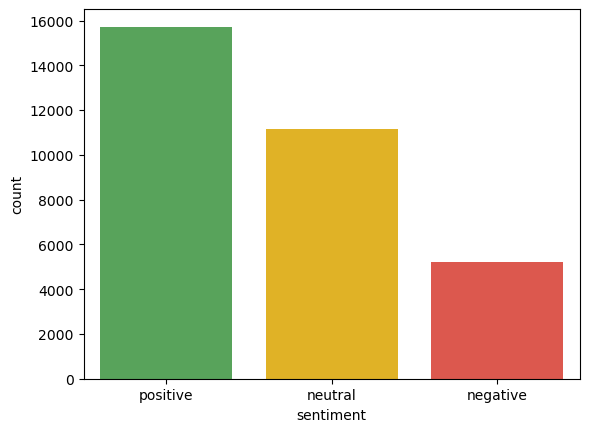

In [ ]:
import seaborn as sns
custom_palette = ["#4CAF50", "#FFC107", "#F44336"]
sns.countplot(data = df_train1, x = 'sentiment', palette = custom_palette)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

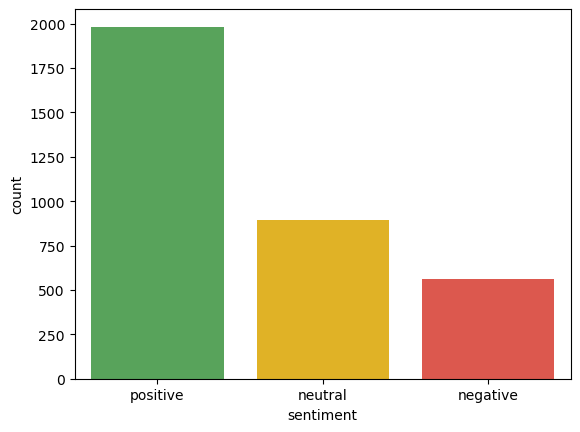

In [ ]:
custom_palette = ["#4CAF50", "#FFC107", "#F44336"]
sns.countplot(data=df_test1, x = 'sentiment', palette = custom_palette)

### Finding the number of words in the tweet

In [ ]:
df_train1['Num_word_text'] = df_train1['Cleaned_Text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
df_train1.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\1999714234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['Num_word_text'] = df_train1['Cleaned_Text'].apply(lambda x:len(str(x).split())) #Number Of words in main text


Text  \
1  @AlexandrovnaIng Prohibition of ChatGPT has be...   
3  Bow down to chatGPT 🫡..... https://t.co/ENTSzi...   
6  ChatGPT runs 10K Nvidia training GPUs with pot...   
7  @SWENGDAD There is repetitive work in every jo...   
8  I created a fictional jewelry brand using Chat...   

                                        Cleaned_Text sentiment  Num_word_text  
1  prohibition chatgpt ha added honor code daught...  positive              8  
3                                        bow chatgpt   neutral              2  
6  chatgpt run nvidia training gpus potential tho...   neutral              7  
7  repetitive work every job lot small task lever...  negative             15  
8  created fictional jewelry brand using chatgpt ...  positive              7

## Most common words in the tweet

In [ ]:
from collections import Counter
df_train1['temp_list'] = df_train1['Cleaned_Text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_train1['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

C:\Users\asus\AppData\Local\Temp\ipykernel_18704\1957485460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['temp_list'] = df_train1['Cleaned_Text'].apply(lambda x:str(x).split())


In [ ]:
import plotly.express as px
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

Above is the most common words used in the tweet. However, this is the overall common words irrespective of the sentiment of the tweet.

- Now lets find the coommon words with respect to each sentiment

### Most common words Sentiments Wise

In [ ]:
Positive = df_train1[df_train1['sentiment']=='positive']
Negative = df_train1[df_train1['sentiment']=='negative']
Neutral = df_train1[df_train1['sentiment']=='neutral']

### Most common words in positive sentiment

In [ ]:
top = Counter([item for sublist in Positive['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [ ]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

### Most common words in negative sentiment

In [ ]:
#MosT common negative words
top = Counter([item for sublist in Negative['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [ ]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

### Most common words in Neutral sentiment

In [ ]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

In [ ]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

From the above we could find that the common words for each sentiment is common is all type of sentiment. Therefore now let us find the most unique words in each sentiment.

In [ ]:
raw_text = [word for word_list in df_train1['temp_list'] for word in word_list]

In [ ]:
def words_unique(sentiment,numwords,raw_words):

    allother = []
    for item in df_train1[df_train1.sentiment != sentiment]['temp_list']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))

    specificnonly = [x for x in raw_text if x not in allother]

    mycounter = Counter()
    for item in df_train1[df_train1.sentiment == sentiment]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)

    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]

    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])

    return Unique_words

### Most Unique positive words

In [ ]:

Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


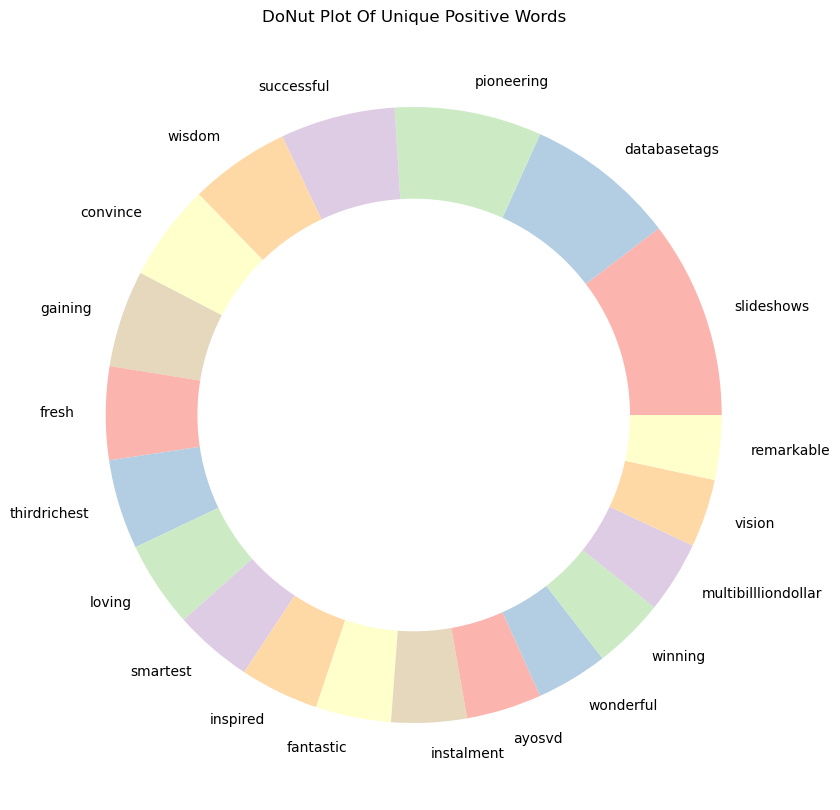

In [ ]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

### Most Unique negative words

In [ ]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


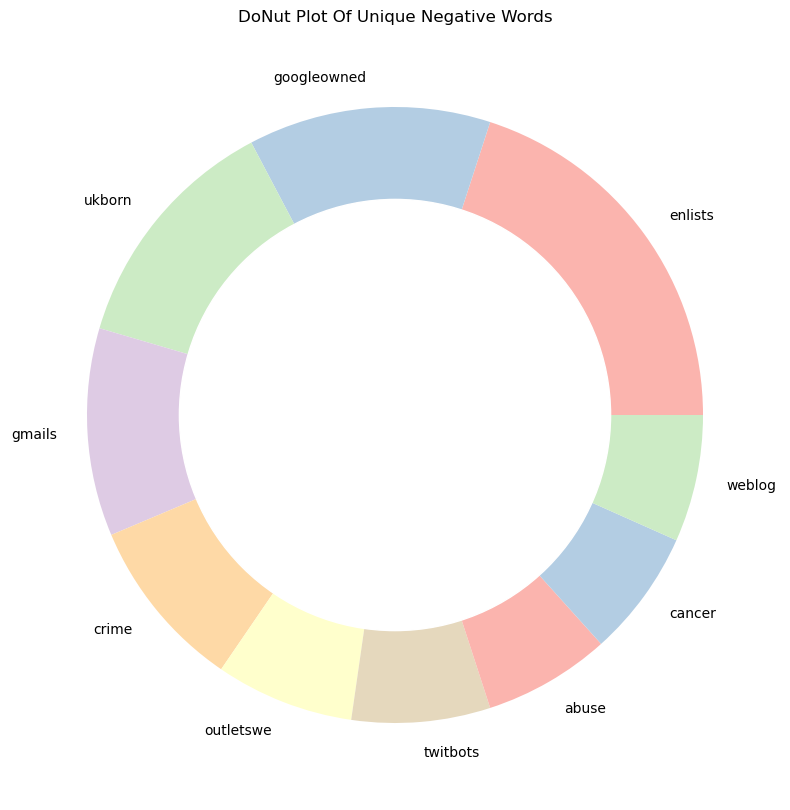

In [ ]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.show()

### Most Unique neutral words

In [ ]:
Unique_Neutral= words_unique('neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Blues')

The top 10 unique words in Neutral Tweets are:


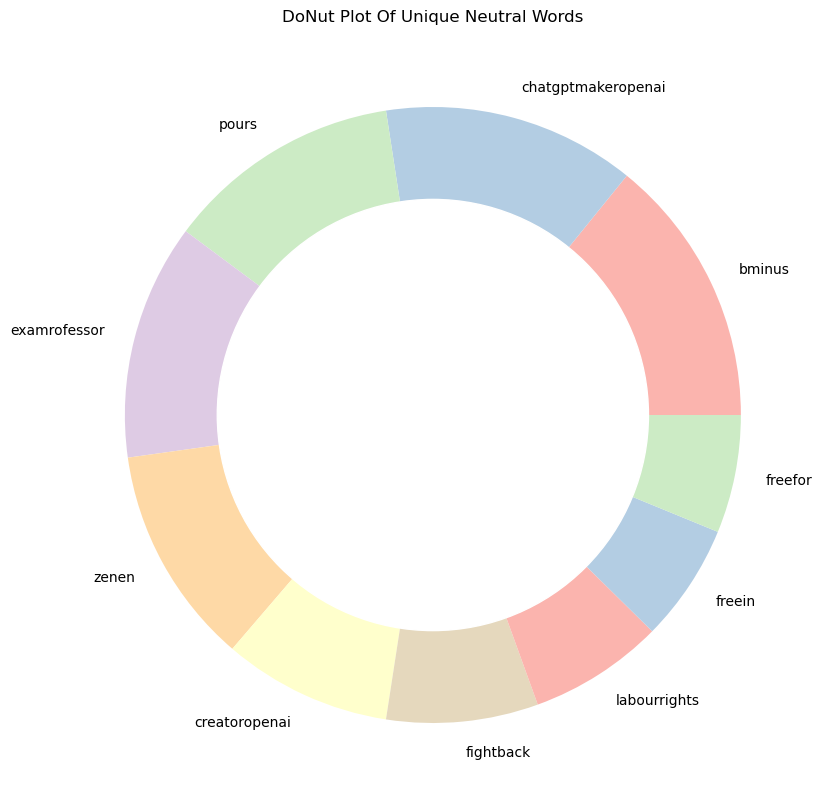

In [ ]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')
plt.show()

In [ ]:
#pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Plot a cloud of words for negative tweets

In [ ]:
data_neg = df_train1[df_train1['sentiment']== 'negative']
data_neg = data_neg['Cleaned_Text']
data_neg.head()

7     repetitive work every job lot small task lever...
18    pay per month start using brain againchatgpt paid
23    anxiety get want use chatgpt afraid find capac...
27                              google freaking chatgpt
30               problem pakistan day according chatgpt
Name: Cleaned_Text, dtype: object

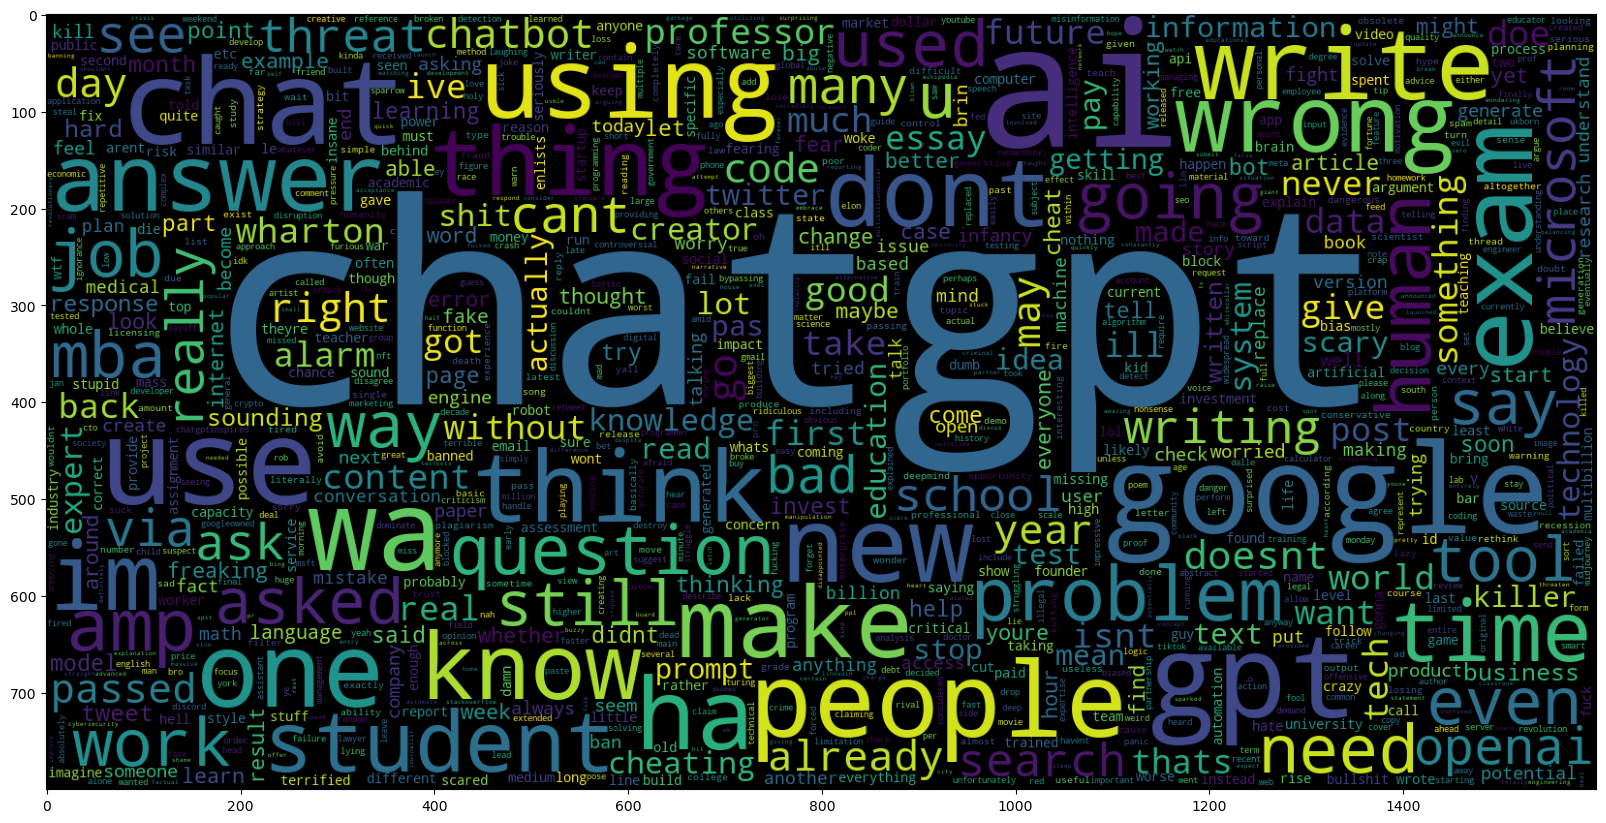

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

### Plot a cloud of words for positive tweets

In [ ]:
data_pos = df_train1[df_train1['sentiment']== 'positive']
data_pos = data_pos['Cleaned_Text']
data_pos.head()

1     prohibition chatgpt ha added honor code daught...
8     created fictional jewelry brand using chatgpt ...
9     look similar irobot company install mini fridg...
10    ever played game like assassin creed odyssey v...
15                                 writes excel formula
Name: Cleaned_Text, dtype: object

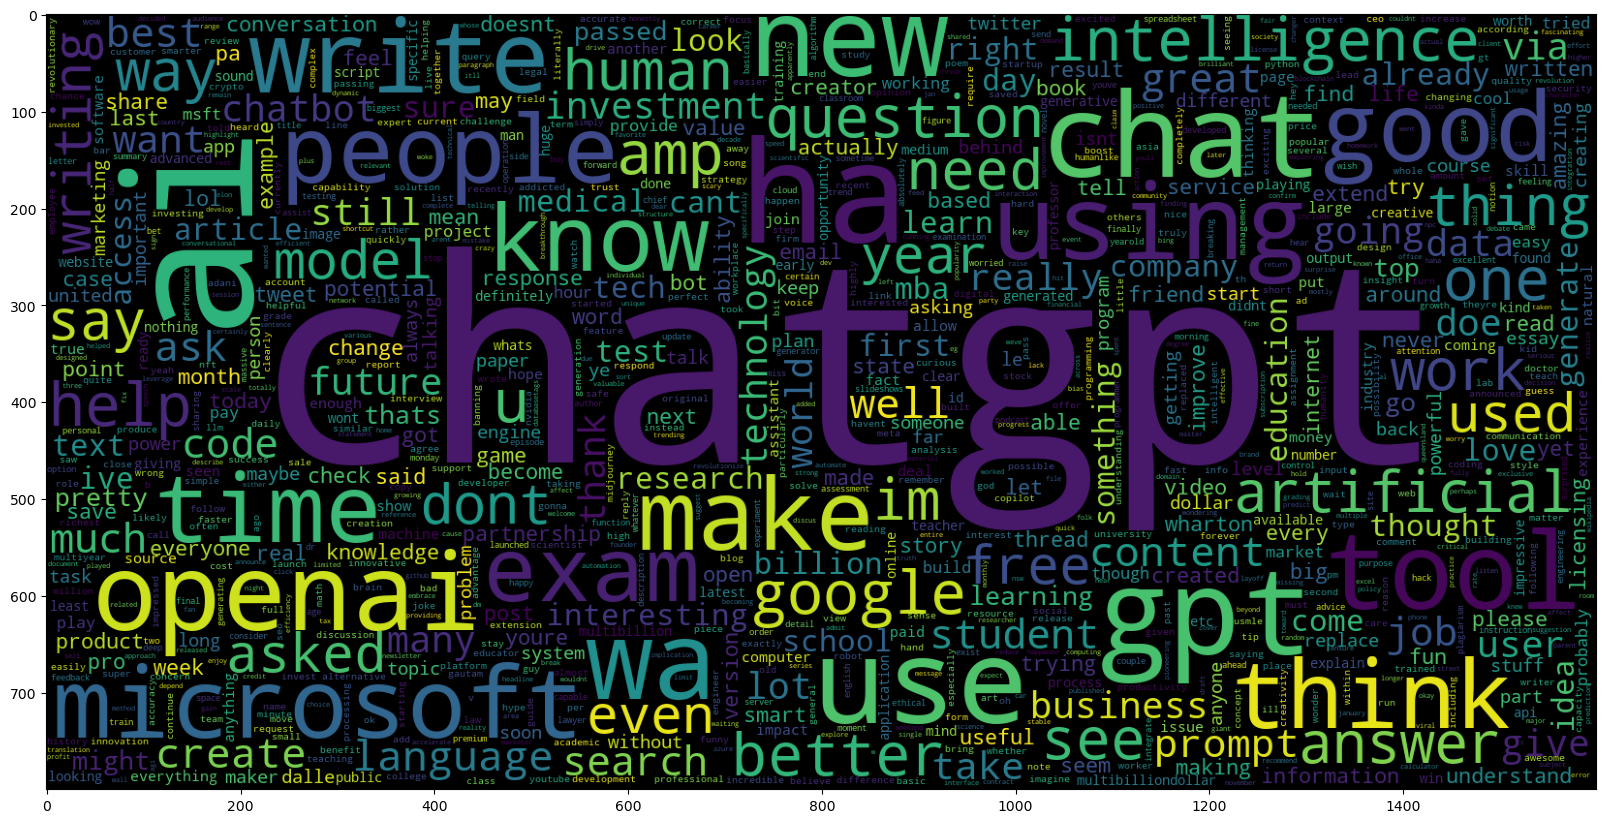

In [ ]:

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

### Plot a cloud of words for neutral tweets

In [ ]:
data_neu = df_train1[df_train1['sentiment']== 'neutral']
data_neu = data_neu['Cleaned_Text']
data_neu.head()

3                                           bow chatgpt
6     chatgpt run nvidia training gpus potential tho...
11          ai initiate new era entrepreneurship thesis
21                                 aint got time agenda
25                                              chatgpt
Name: Cleaned_Text, dtype: object

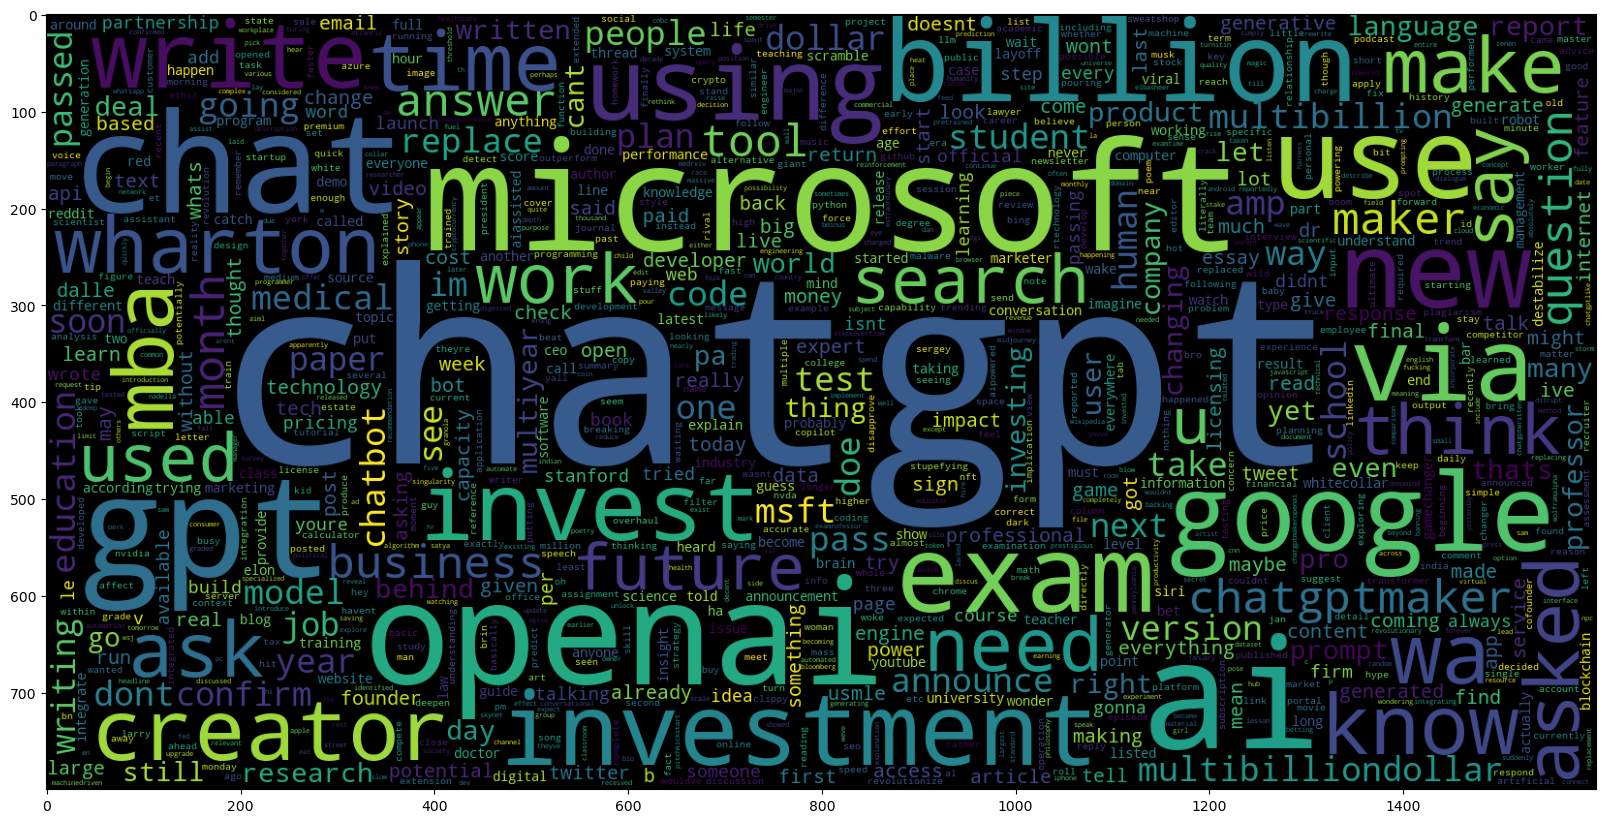

In [ ]:

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_neu))
plt.figure(figsize = (20,20))
plt.imshow(wc)

### Separating input feature and label

In [ ]:
X=df_train1.Cleaned_Text
y=df_train1.sentiment

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


## Transforming the Dataset Using TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  170510


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### Transform the data using TF-IDF Vectorizer

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

## Model Building

In  the problem statement, we have used three different models respectively :

- Bernoulli Naive Bayes Classifier
- SVM (Support Vector Machine)
- Logistic Regression
The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models, and then try to find out the one which gives the best performance among them.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,plot_confusion_matrix

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred1 = BNBmodel.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    negative       0.96      0.04      0.08      1520
     neutral       0.71      0.86      0.78      3418
    positive       0.75      0.87      0.80      4685

    accuracy                           0.73      9623
   macro avg       0.80      0.59      0.55      9623
weighted avg       0.77      0.73      0.68      9623



In [ ]:
confusion_matrix(y_test, y_pred1)

array([[  66,  574,  880],
       [   2, 2934,  482],
       [   1,  630, 4054]], dtype=int64)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



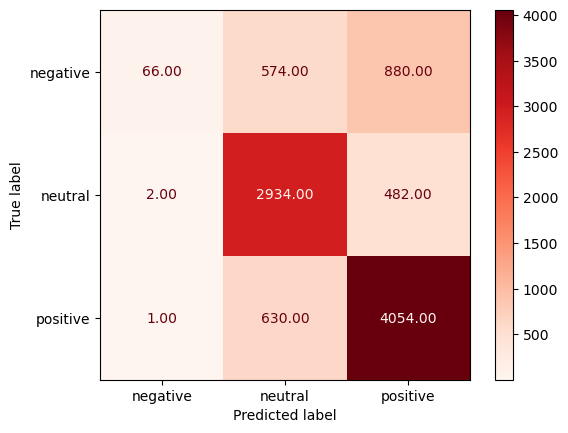

In [ ]:
plot_confusion_matrix(BNBmodel,X_test,y_test,display_labels =["negative","neutral",'positive'],cmap = plt.cm.Reds, values_format = '.2f')

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)

y_pred2 = SVCmodel.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

    negative       0.84      0.60      0.70      1520
     neutral       0.87      0.86      0.87      3418
    positive       0.84      0.93      0.88      4685

    accuracy                           0.85      9623
   macro avg       0.85      0.80      0.82      9623
weighted avg       0.85      0.85      0.85      9623



In [ ]:
confusion_matrix(y_test, y_pred2)

array([[ 909,  201,  410],
       [  64, 2945,  409],
       [ 105,  237, 4343]], dtype=int64)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



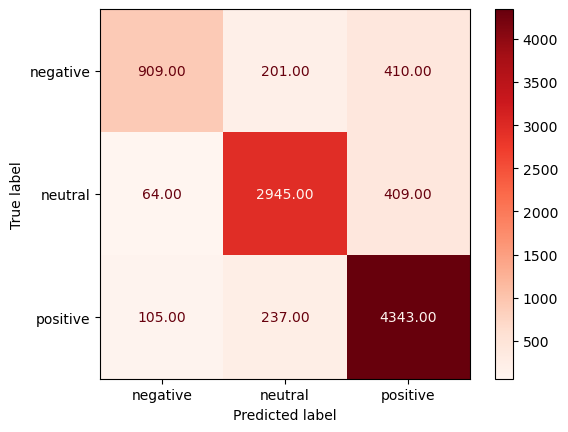

In [ ]:
plot_confusion_matrix(SVCmodel,X_test,y_test,display_labels =["negative","neutral",'positive'],cmap = plt.cm.Reds, values_format = '.2f')

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000)
LRmodel.fit(X_train, y_train)
y_pred3 = LRmodel.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

    negative       0.85      0.48      0.62      1520
     neutral       0.84      0.84      0.84      3418
    positive       0.81      0.93      0.86      4685

    accuracy                           0.82      9623
   macro avg       0.83      0.75      0.77      9623
weighted avg       0.83      0.82      0.82      9623



In [ ]:
confusion_matrix(y_test, y_pred3)

array([[ 735,  279,  506],
       [  47, 2856,  515],
       [  78,  273, 4334]], dtype=int64)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



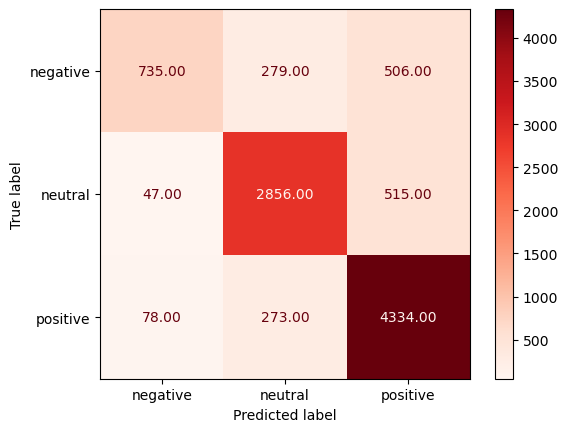

In [ ]:
plot_confusion_matrix(LRmodel,X_test,y_test,display_labels =["negative","neutral",'positive'],cmap = plt.cm.Reds, values_format = '.2f')

## Best Model :

Upon evaluating all the models, we can conclude the following details i.e.

- Accuracy: As far as the accuracy of the model is concerned, SVM performs better than Logistic Regression,Bernoulli Naive Bayes.

- We got an accuracy of 85 for SVM.

We, therefore, conclude that the SVM is the best model for the above-given dataset.

Now let us apply in our test data and predict the sentiment of each tweet

In [ ]:
df_test1.head()

Text  \
0  Microsoft invests $10 billion in OpenAI's Chat...   
1  【Current Affairs Ask AI】Randomly generate Wind...   
2  Italy curbs ChatGPT, starts probe over privacy...   
3  I want to wake up every morning with you by my...   
4  ChatGPT Is Banned in Italy Over Privacy Concer...   

                                        Cleaned_Text sentiment  
0  microsoft invests billion openais chatgpt chat...  positive  
1  current affair ask airandomly generate window ...  positive  
2     italy curb chatgpt start probe privacy concern   neutral  
3             want wake every morning side rest life  positive  
4               chatgpt banned italy privacy concern  negative

In [ ]:
test = df_test1['Cleaned_Text']
test  = vectoriser.transform(test)

In [ ]:
result = SVCmodel.predict(test)

In [ ]:
result

array(['positive', 'positive', 'neutral', ..., 'positive', 'positive',
       'positive'], dtype=object)

# accuracy_score of predicted test data and generated sentiment

In [ ]:
accuracy_score(df_test1['sentiment'],result)

0.8393375944218477

We can find that the accuracy score of our test data that we predicted as .839 accuracy. Hence our model in best for the prediction.